In [1]:
# %matplotlib widget
import flow
import pool
import numpy as np
import cascade
import matplotlib.pyplot as plt
from copy import deepcopy

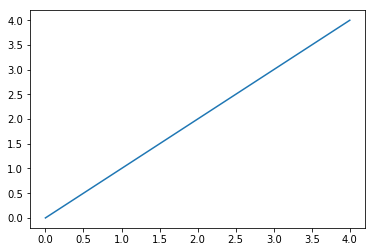

In [2]:
plt.plot(range(5))

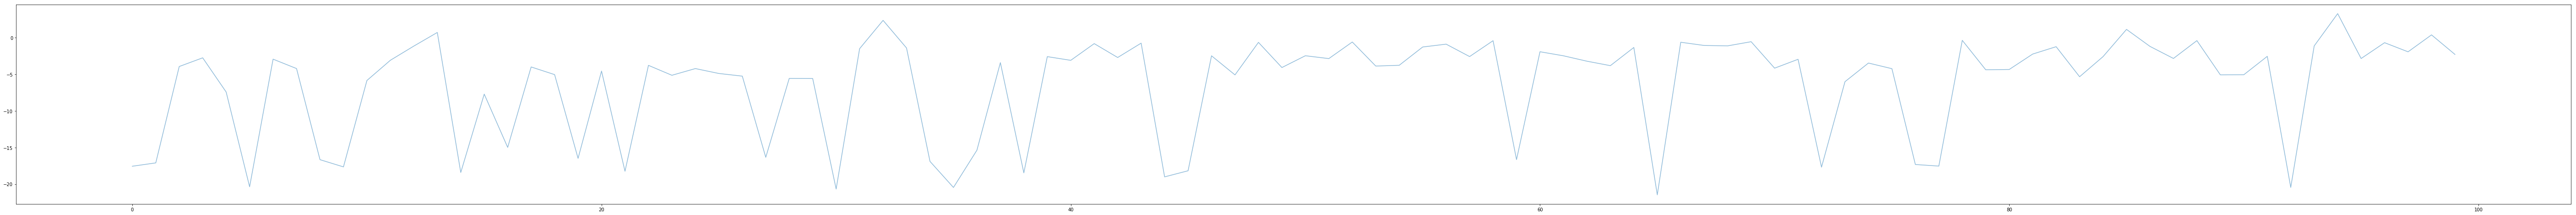

In [49]:
days = flow.DateSorter.frommeta(mice=['OA27'], tags=None)
date = days[0]
window = 4

# # create window for convolution
# win = np.concatenate((np.ones(int(t2p.framerate*window)), np.zeros(int(t2p.framerate*window))))

# # get traces for whole day and a mask vector for pre-stim period
runs = date.runs()
traces, masks = [], []
for run in runs:
    t2p = run.trace2p()
    win = np.concatenate((np.ones(int(t2p.framerate*window)), np.zeros(int(t2p.framerate*window))))
    mask = np.zeros(t2p.nframes)
    mask[t2p.csonsets()] = 1

    # convolve onsets with window you wish to use in calc
    mask = np.isin(np.convolve(mask, win, mode='same'), 1)
    masks.append(mask)
    traces.append(t2p.d['dff'])

traces = np.concatenate(traces, axis=1)
traces_og = traces
for cell in range(np.shape(traces)[0]):
    if np.nansum(traces[cell,:]>8) > 0:
        plt.figure(figsize=(100,8))
        plt.plot(traces_og[cell,0:100], alpha=0.5)
# masks = np.concatenate(masks, axis=0)
# mu = np.nanmean(traces[:, masks], axis=1)

# sigma = np.nanstd(self.d['dff'][:, mask], axis=1)

# self.d['zscore_iti'] = ((self.d['dff'].T - mu)/sigma).T

In [5]:
noise = np.zeros(np.shape(traces))
noise[traces > 8] = 1
added = np.random.random(noise.shape)
noise *= 0.02 * np.random.random_sample(noise.shape) - 0.01
noise.flatten()

array([-0., -0., -0., ...,  0.,  0.,  0.])

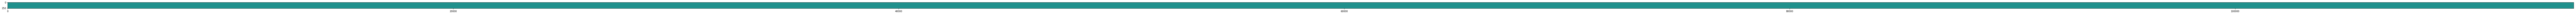

1990
[    0     1     2 ... 56687 56688 56689]


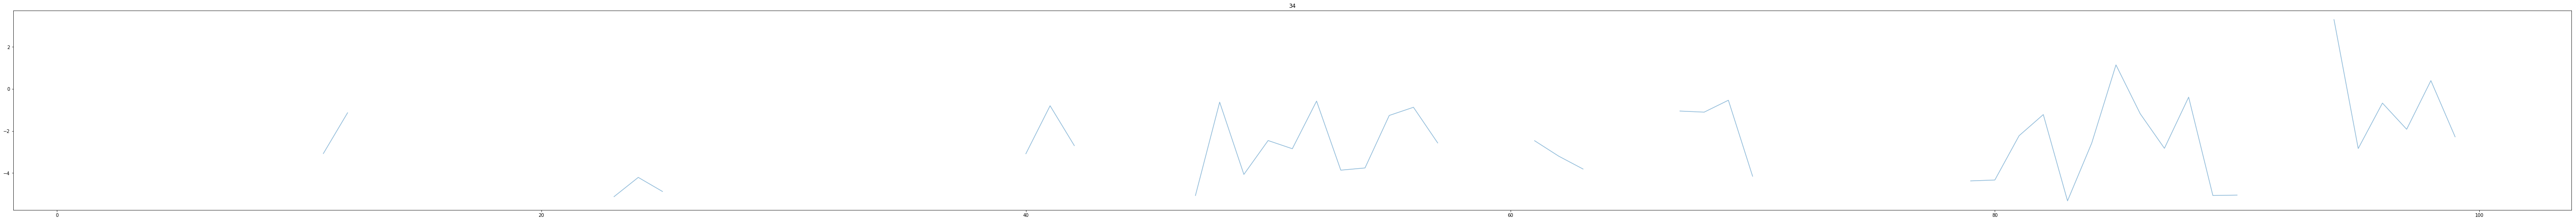

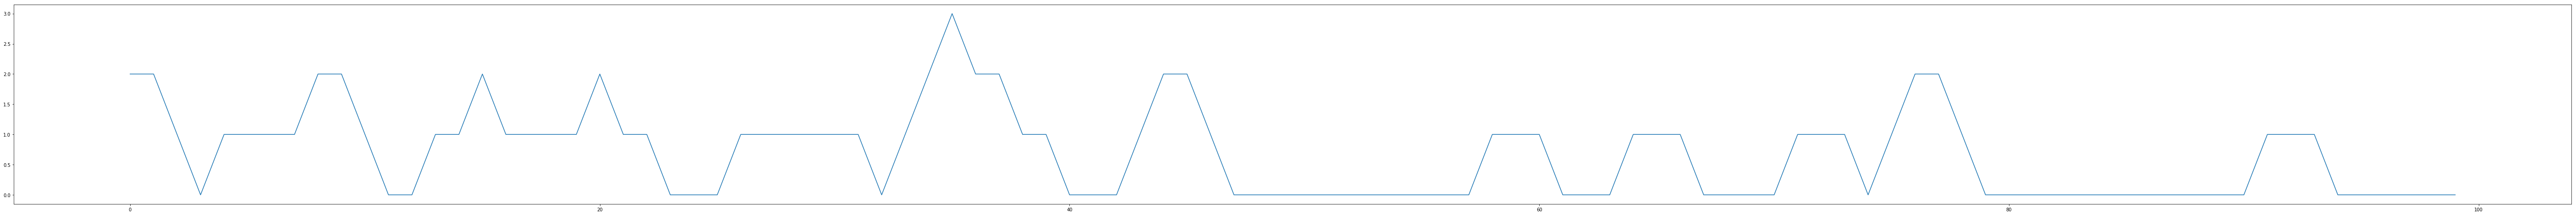

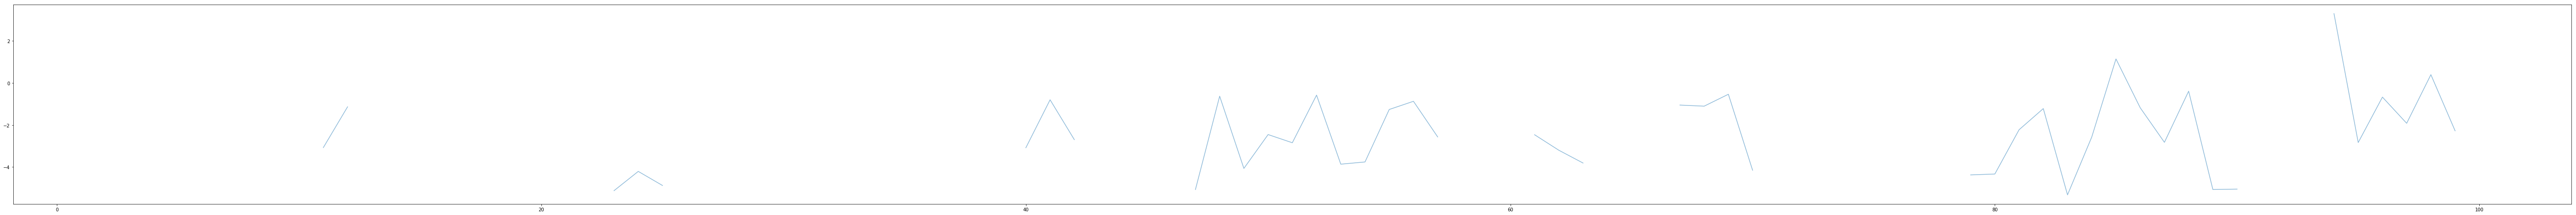

In [52]:
thresh = 8
noise = np.zeros(np.shape(traces))
noise[np.abs(traces) > thresh] = 1
print(np.sum((noise != 0).flatten()))
for cell in range(np.shape(traces)[0]):
    noise[cell, :] = np.convolve(noise[cell, :], np.ones(3), mode='same')
# noise *= 0.02 * np.random.random_sample(noise.shape) - 0.01
# print(np.sum((noise != 0).flatten()))
traces[noise != 0] = np.nan
# traces = traces + noise

for cell in range(np.shape(traces)[0]):
    if np.sum(np.abs(noise[cell, :])) > 0:
        print(np.where(noise[cell, :] != 0)[0])
        plt.figure(figsize=(100,8))
#         plt.plot(traces_og[cell,0:100], alpha=0.5)
        plt.plot(traces[cell,0:100], alpha=0.5)
        plt.title(str(cell))
        plt.figure(figsize=(100,8))
        plt.plot(noise[cell, 0:100])
        plt.figure(figsize=(100,8))
        plt.plot(traces_og[cell,0:100], alpha=0.5)

In [56]:
trace_type = 'zscore'
if 'zscore' in trace_type:
    print('yes')

yes


In [41]:
t2p = run.trace2p()
date = flow.sorters.Date(mouse=run.mouse, date=run.date)

# trigger all trials around stimulus onsets
run_traces = t2p.cstraces(cs, start_s=start_time, end_s=end_time,
                          trace_type='dff', cutoff_before_lick_ms=-1,
                              errortrials=-1, baseline=(-1, 0),
                              baseline_to_stimulus=True)

mu = pool.calc.zscore.iti_mu(date)
sigma = pool.calc.zscore.iti_sigma(date)

In [50]:
np.shape(sigma)
np.shape(run_traces)
sz = np.shape(run_traces)
test = run_traces.reshape((sz[0], sz[1]*sz[2]))
(((run_traces.reshape((sz[0], sz[1]*sz[2])).T - mu)/sigma).T).reshape((sz[0], sz[1], sz[2]))
np.shape(test)

(264, 47740)

In [51]:
np.shape(((run_traces.reshape((sz[0], sz[1]*sz[2])).T - mu)/sigma).T).reshape((sz[0], sz[1], sz[2]))

(264, 47740)

In [3]:
mouse = 'OA27'
cs=''
trace_type='zscore'
start_time=-1
end_time=6
downsample=True
verbose=True

In [17]:
runs = flow.RunSorter.frommeta(mice=['OA27'])
test_traces = cascade.utils.getcstraces(runs[0], trace_type='zscore_iti', nan_artifacts=True, downsample=True)

In [12]:
runs = flow.RunSorter.frommeta(mice=['OA27'])

# get your t2p object
t2p = runs[0].trace2p()

# trigger all trials around stimulus onsets to get trial number
run_traces = t2p.cstraces('', start_s=start_time, end_s=end_time, trace_type=trace_type,
                cutoff_before_lick_ms=-1, errortrials=-1, baseline=(-1, 0),
                baseline_to_stimulus=True)

# trigger all trials around stimulus onsets to get trial number
run_traces2 = t2p.warpcstraces('', start_s=start_time, end_s=end_time, trace_type=trace_type,
                cutoff_before_lick_ms=-1, errortrials=-1, baseline=(-1, 0),
                baseline_to_stimulus=True)

# trigger all trials around stimulus onsets to get trial number
# run_traces3 = t2p.cstraces('', start_s=start_time, end_s=end_time, trace_type='dff',
#                 cutoff_before_lick_ms=-1, errortrials=-1, baseline=(-1, 0),
#                 baseline_to_stimulus=True)

In [20]:
# celln = 1
# plt.figure()
# plt.imshow(run_traces[celln,:,:].T)
# plt.colorbar()

# plt.figure()
# plt.imshow(run_traces2[celln,:,:].T)
# plt.colorbar()
print(np.shape(run_traces))
run_traces = deepcopy(back)
# plt.figure()
# plt.imshow(test_traces[celln,:,:].T)
# plt.colorbar()

(264, 217, 220)


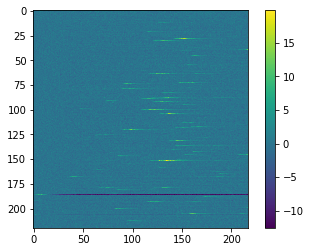

In [76]:
celln = 42
plt.figure()
plt.imshow(back[celln,:,:].T)
plt.colorbar()

In [16]:
# run_traces[0:10, :, :] = 1000

In [17]:
sz = np.shape(run_traces)  # dims: (cells, time, trials)
run_traces = run_traces.reshape((sz[0], sz[1]*sz[2]))

5 105.0
13 3.0
20 87.0
28 6.0
29 3.0
37 48.0
42 21.0
45 24.0
56 3.0
72 84.0
82 12.0
93 18.0
94 3.0
103 12.0
107 3.0
140 3.0
162 3.0
220 36.0
236 6.0
250 3.0


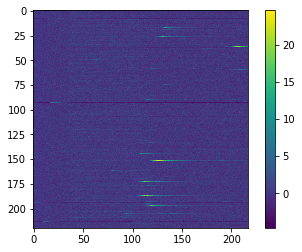

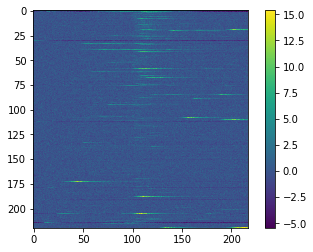

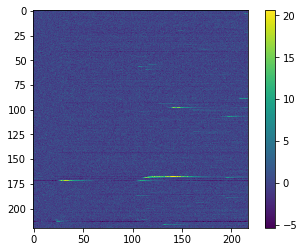

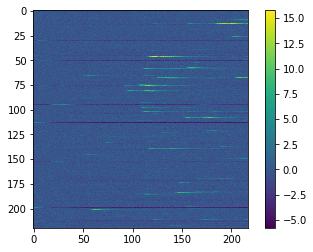

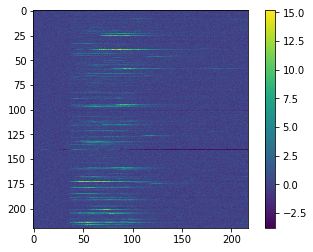

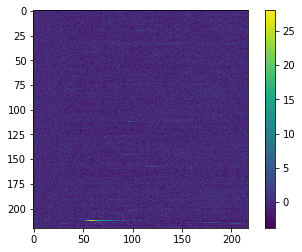

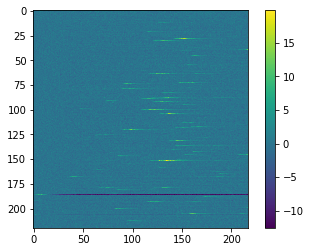

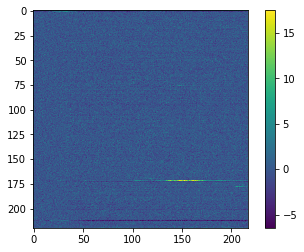

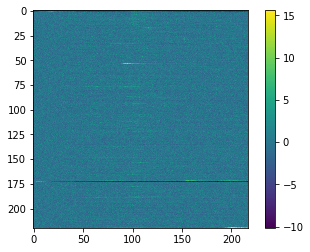

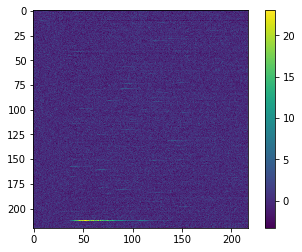

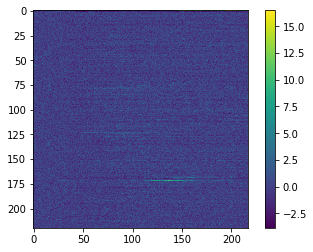

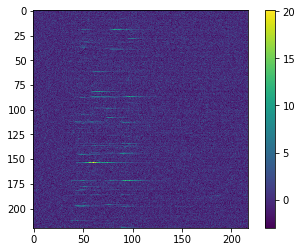

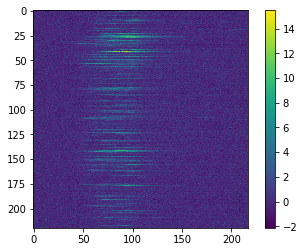

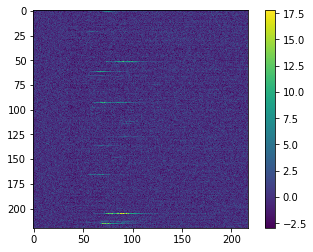

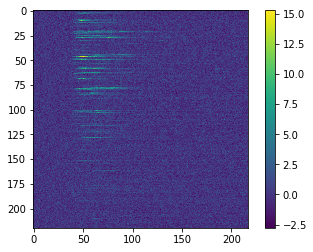

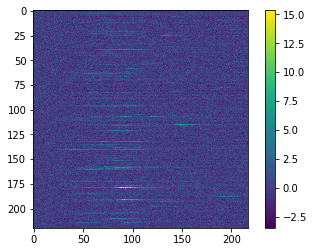

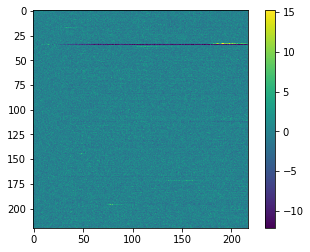

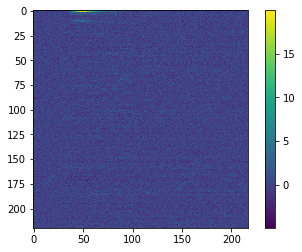

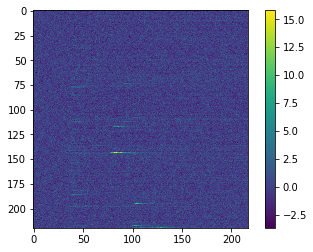

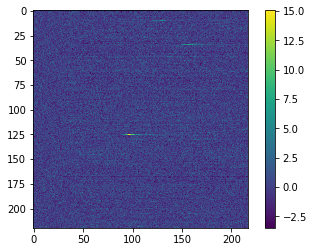

In [77]:
sz = np.shape(run_traces)  # dims: (cells, time, trials)
# run_traces = run_traces.reshape((sz[0], sz[1]*sz[2]))
nanpad = np.zeros(np.shape(run_traces))
nanpad[np.abs(run_traces) > 15] = 1
# dialate around threshold crossings
for cell in range(sz[0]):
    nanpad[cell, :] = np.convolve(nanpad[cell, :], np.ones(3), mode='same')
    if np.nansum(nanpad[cell, :]) > 0:
        print(cell, np.nansum(nanpad[cell, :]))
        plt.figure()
        plt.imshow(back[cell,:,:].T)
        plt.colorbar()
# remove with nans or interpolation
# for cell in range(sz[0]):
#     x = np.nonzero(np.isfinite(run_traces[cell, :]))[0]
#     blank = np.where(run_traces[cell, :] != 0)[0]
#     run_traces[cell, blank] = np.interp(x(blank), x(~blank), run_traces[cell, ~blank])

# run_traces = run_traces.reshape((sz[0], sz[1], sz[2]))

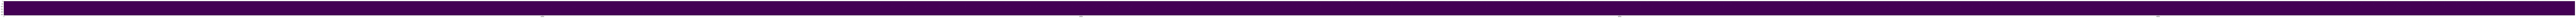

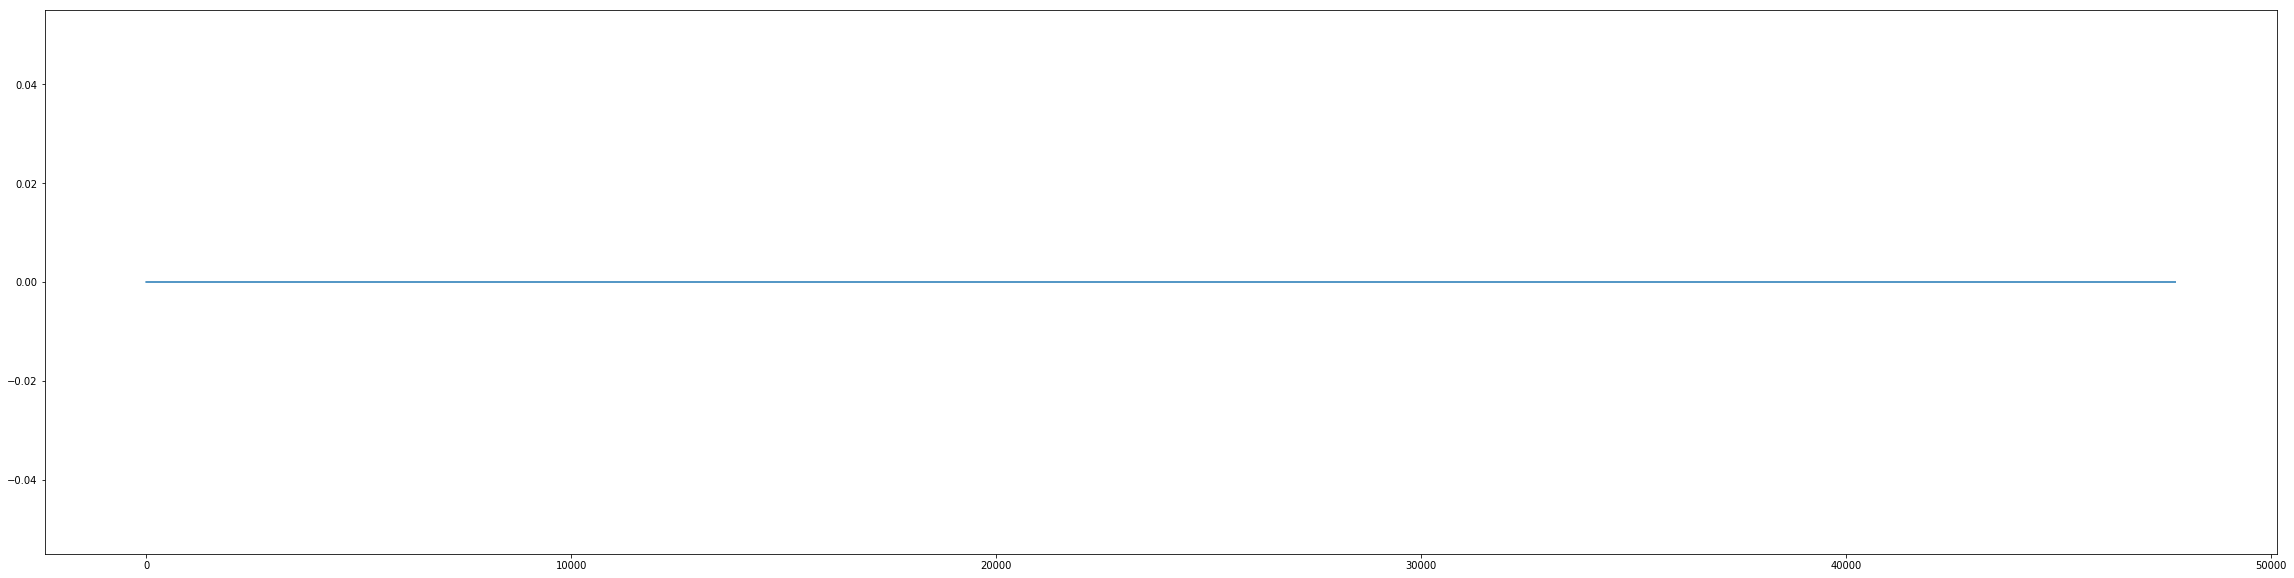

In [59]:
plt.figure(figsize=(400,10))
plt.imshow(nanpad)
plt.figure(figsize=(40,10))
plt.plot(nanpad[2,:])

In [54]:
a = 'test'
value = False if a is None else True
tcs = '20'
save_pad = '' if a else ' '
save_pad

''

2 744.0


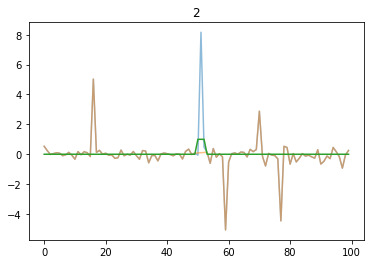

In [33]:
# for cell in range(sz[0]):
backup = deepcopy(run_traces)
cell = 2
x = np.where(np.isfinite(run_traces[cell, :]))[0]
if np.nansum(nanpad[cell, :]) > 0:
    print(str(cell), np.nansum(nanpad[cell, :]))
    plt.figure()
    plt.title(str(cell))
    blank = np.where(nanpad[cell, :] != 0)[0]
    plt.plot(backup[cell, (blank[0]-50):(blank[0]+50)], alpha=0.5)
    keep = np.where(nanpad[cell, :] == 0)[0]
    run_traces[cell, blank] = np.interp(x[blank], x[keep], run_traces[cell, keep])
    plt.plot(run_traces[cell, (blank[0]-50):(blank[0]+50)], alpha=0.5)
    plt.plot(nanpad[cell, (blank[0]-50):(blank[0]+50)])

In [56]:
np.array([1, 1, 1, np.nan]) > 0

/Users/kelly_mcguire/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([ True,  True,  True, False])

(-5, 5)

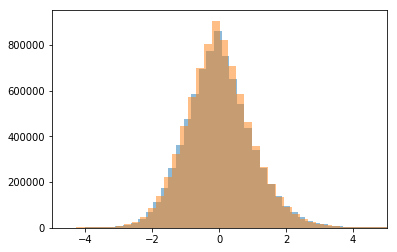

In [16]:
plt.figure()
plt.hist(run_traces.flatten(), 1000, alpha=0.5)
plt.hist(run_traces2.flatten(), 1000, alpha=0.5)
plt.xlim((-5, 5))
# plt.hist(run_traces3.flatten(), 100)